In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import joblib
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

# **CATEGORY DIVISION**

In [3]:
print(df1.head())
print(df2.head())

                                category                       sub_category  \
0  Online and Social Media Related Crime  Cyber Bullying  Stalking  Sexting   
1                 Online Financial Fraud                  Fraud CallVishing   
2               Online Gambling  Betting           Online Gambling  Betting   
3  Online and Social Media Related Crime                   Online Job Fraud   
4                 Online Financial Fraud                  Fraud CallVishing   

                                  crimeaditionalinfo  
0  I had continue received random calls and abusi...  
1  The above fraudster is continuously messaging ...  
2  He is acting like a police and demanding for m...  
3  In apna Job I have applied for job interview f...  
4  I received a call from lady stating that she w...  
                                    category  \
0  RapeGang Rape RGRSexually Abusive Content   
1                     Online Financial Fraud   
2             Cyber Attack/ Dependent Crimes   
3  

In [4]:
def decontract(sentence):
    sentence = str(sentence)
    sentence = re.sub(r"won't", "will not", sentence)
    sentence = re.sub(r"can\'t", "can not", sentence)
    sentence = re.sub(r"n\'t", " not", sentence)
    sentence = re.sub(r"\'re", " are", sentence)
    sentence = re.sub(r"\'s", " is", sentence)
    sentence = re.sub(r"\'d", " would", sentence)
    sentence = re.sub(r"\'ll", " will", sentence)
    sentence = re.sub(r"\'t", " not", sentence)
    sentence = re.sub(r"\'ve", " have", sentence)
    sentence = re.sub(r"\'m", " am", sentence)
    return sentence

def cleanPunc(sentence):
    sentence = str(sentence)
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    sentence = str(sentence)
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', '', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

def removeStopWords(sentence):
    sentence = str(sentence)
    global re_stop_words
    return re_stop_words.sub("", sentence)

stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

re_stop_words = re.compile(r"\b(" + "|".join(stopwords) + ")\W", re.I)

stemmer = SnowballStemmer("english")
def stemming(sentence):
    sentence = str(sentence)
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

<>:54: SyntaxWarning: invalid escape sequence '\W'
<>:54: SyntaxWarning: invalid escape sequence '\W'
/var/folders/js/0lbwmbwj7rjccdmpwxqcdhrm0000gn/T/ipykernel_51078/1690815349.py:54: SyntaxWarning: invalid escape sequence '\W'
  re_stop_words = re.compile(r"\b(" + "|".join(stopwords) + ")\W", re.I)


In [5]:
df1['crimeaditionalinfo'] = df1['crimeaditionalinfo'].str.lower()
df1['crimeaditionalinfo'] = df1['crimeaditionalinfo'].apply(decontract)
df1['crimeaditionalinfo'] = df1['crimeaditionalinfo'].apply(cleanPunc)
df1['crimeaditionalinfo'] = df1['crimeaditionalinfo'].apply(keepAlpha)
df1['crimeaditionalinfo'] = df1['crimeaditionalinfo'].apply(removeStopWords)
df1['crimeaditionalinfo'] = df1['crimeaditionalinfo'].apply(stemming)

In [6]:
df2['crimeaditionalinfo'] = df2['crimeaditionalinfo'].str.lower()
df2['crimeaditionalinfo'] = df2['crimeaditionalinfo'].apply(decontract)
df2['crimeaditionalinfo'] = df2['crimeaditionalinfo'].apply(cleanPunc)
df2['crimeaditionalinfo'] = df2['crimeaditionalinfo'].apply(keepAlpha)
df2['crimeaditionalinfo'] = df2['crimeaditionalinfo'].apply(removeStopWords)
df2['crimeaditionalinfo'] = df2['crimeaditionalinfo'].apply(stemming)

In [7]:
all_categories = pd.concat([df1['category'], df2['category']]).unique()

for category in all_categories:
    df1[f'Category_{category}'] = 0
    df2[f'Category_{category}'] = 0

for index, row in df1.iterrows():
    category_col = f'Category_{row["category"]}'
    df1.at[index, category_col] = 1

for index, row in df2.iterrows():
    category_col = f'Category_{row["category"]}'
    df2.at[index, category_col] = 1

print("df1:")
print(df1)
print("\ndf2:")

df1:
                                    category  \
0      Online and Social Media Related Crime   
1                     Online Financial Fraud   
2                   Online Gambling  Betting   
3      Online and Social Media Related Crime   
4                     Online Financial Fraud   
...                                      ...   
93681                 Online Financial Fraud   
93682                 Online Financial Fraud   
93683                 Online Financial Fraud   
93684  Online and Social Media Related Crime   
93685                 Online Financial Fraud   

                            sub_category  \
0      Cyber Bullying  Stalking  Sexting   
1                      Fraud CallVishing   
2               Online Gambling  Betting   
3                       Online Job Fraud   
4                      Fraud CallVishing   
...                                  ...   
93681     Internet Banking Related Fraud   
93682              EWallet Related Fraud   
93683                 

In [8]:
df1['sub_category'].fillna('No Subcategory', inplace=True)
df2['sub_category'].fillna('No Subcategory', inplace=True)
all_categories = pd.concat([df1['sub_category'], df2['sub_category']]).unique()

for sub_category in all_categories:
    df1[f'Sub_Category_{sub_category}'] = 0
    df2[f'Sub_Category_{sub_category}'] = 0

for index, row in df1.iterrows():
    category_col = f'Sub_Category_{row["sub_category"]}'
    df1.at[index, category_col] = 1

for index, row in df2.iterrows():
    category_col = f'Sub_Category_{row["sub_category"]}'
    df2.at[index, category_col] = 1

print("df1:")
print(df1)
print("\ndf2:")

/var/folders/js/0lbwmbwj7rjccdmpwxqcdhrm0000gn/T/ipykernel_51078/2414231748.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['sub_category'].fillna('No Subcategory', inplace=True)
/var/folders/js/0lbwmbwj7rjccdmpwxqcdhrm0000gn/T/ipykernel_51078/2414231748.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

df1:
                                    category  \
0      Online and Social Media Related Crime   
1                     Online Financial Fraud   
2                   Online Gambling  Betting   
3      Online and Social Media Related Crime   
4                     Online Financial Fraud   
...                                      ...   
93681                 Online Financial Fraud   
93682                 Online Financial Fraud   
93683                 Online Financial Fraud   
93684  Online and Social Media Related Crime   
93685                 Online Financial Fraud   

                            sub_category  \
0      Cyber Bullying  Stalking  Sexting   
1                      Fraud CallVishing   
2               Online Gambling  Betting   
3                       Online Job Fraud   
4                      Fraud CallVishing   
...                                  ...   
93681     Internet Banking Related Fraud   
93682              EWallet Related Fraud   
93683                 

In [9]:
df2.head()

,category,sub_category,crimeaditionalinfo,Category_Online and Social Media Related Crime,Category_Online Financial Fraud,Category_Online Gambling Betting,Category_RapeGang Rape RGRSexually Abusive Content,Category_Any Other Cyber Crime,Category_Cyber Attack/ Dependent Crimes,Category_Cryptocurrency Crime,...,Sub_Category_Website DefacementHacking,Sub_Category_Damage to computer computer systems etc,Sub_Category_Impersonating Email,Sub_Category_EMail Phishing,Sub_Category_Ransomware,Sub_Category_Intimidating Email,Sub_Category_Against Interest of sovereignty or integrity of India,Sub_Category_Computer Generated CSAM/CSEM,Sub_Category_Cyber Blackmailing & Threatening,Sub_Category_Sexual Harassment
0,RapeGang Rape RGRSexually Abusive Content,No Subcategory,sir namaskar mein ranjit kumar patrapais nehi ...,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,kotak mahindra bank fraud fraud amount,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Cyber Attack/ Dependent Crimes,SQL Injection,issu actual start got email first glanc seem l...,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Online Financial Fraud,Fraud CallVishing,amit kumar karwi chitrakoot total depress frau...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Any Other Cyber Crime,Other,order sare blous rinki sur paid amount take pa...,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df1.head()

,category,sub_category,crimeaditionalinfo,Category_Online and Social Media Related Crime,Category_Online Financial Fraud,Category_Online Gambling Betting,Category_RapeGang Rape RGRSexually Abusive Content,Category_Any Other Cyber Crime,Category_Cyber Attack/ Dependent Crimes,Category_Cryptocurrency Crime,...,Sub_Category_Website DefacementHacking,Sub_Category_Damage to computer computer systems etc,Sub_Category_Impersonating Email,Sub_Category_EMail Phishing,Sub_Category_Ransomware,Sub_Category_Intimidating Email,Sub_Category_Against Interest of sovereignty or integrity of India,Sub_Category_Computer Generated CSAM/CSEM,Sub_Category_Cyber Blackmailing & Threatening,Sub_Category_Sexual Harassment
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,continu receiv random call abus messag whatsap...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Online Financial Fraud,Fraud CallVishing,fraudster continu messag ask pay money send fa...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Online Gambling Betting,Online Gambling Betting,act like polic demand money ad section text me...,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Online and Social Media Related Crime,Online Job Fraud,apna job appli job interview telecal resourc m...,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Online Financial Fraud,Fraud CallVishing,receiv call ladi state send new phone vivo rec...,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df1.columns

Index(['category', 'sub_category', 'crimeaditionalinfo',
       'Category_Online and Social Media Related Crime',
       'Category_Online Financial Fraud', 'Category_Online Gambling  Betting',
       'Category_RapeGang Rape RGRSexually Abusive Content',
       'Category_Any Other Cyber Crime',
       'Category_Cyber Attack/ Dependent Crimes',
       'Category_Cryptocurrency Crime', 'Category_Sexually Explicit Act',
       'Category_Sexually Obscene material',
       'Category_Hacking  Damage to computercomputer system etc',
       'Category_Cyber Terrorism',
       'Category_Child Pornography CPChild Sexual Abuse Material CSAM',
       'Category_Online Cyber Trafficking', 'Category_Ransomware',
       'Category_Report Unlawful Content',
       'Category_Crime Against Women & Children',
       'Sub_Category_Cyber Bullying  Stalking  Sexting',
       'Sub_Category_Fraud CallVishing',
       'Sub_Category_Online Gambling  Betting',
       'Sub_Category_Online Job Fraud', 'Sub_Category_UPI

In [12]:
X_train = df1['crimeaditionalinfo']
X_test = df2['crimeaditionalinfo']
y_train = df1[df1.columns[3:18]]
y_test = df2[df2.columns[3:18]]

In [13]:
y_train.head()

,Category_Online and Social Media Related Crime,Category_Online Financial Fraud,Category_Online Gambling Betting,Category_RapeGang Rape RGRSexually Abusive Content,Category_Any Other Cyber Crime,Category_Cyber Attack/ Dependent Crimes,Category_Cryptocurrency Crime,Category_Sexually Explicit Act,Category_Sexually Obscene material,Category_Hacking Damage to computercomputer system etc,Category_Cyber Terrorism,Category_Child Pornography CPChild Sexual Abuse Material CSAM,Category_Online Cyber Trafficking,Category_Ransomware,Category_Report Unlawful Content
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
y_train_sc = df1[df1.columns[19:-1]]
y_test_sc = df2[df2.columns[19:-1]]

In [15]:
y_train_sc.head()

,Sub_Category_Cyber Bullying Stalking Sexting,Sub_Category_Fraud CallVishing,Sub_Category_Online Gambling Betting,Sub_Category_Online Job Fraud,Sub_Category_UPI Related Frauds,Sub_Category_Internet Banking Related Fraud,Sub_Category_No Subcategory,Sub_Category_Other,Sub_Category_Profile Hacking Identity Theft,Sub_Category_DebitCredit Card FraudSim Swap Fraud,...,Sub_Category_Online Matrimonial Fraud,Sub_Category_Website DefacementHacking,Sub_Category_Damage to computer computer systems etc,Sub_Category_Impersonating Email,Sub_Category_EMail Phishing,Sub_Category_Ransomware,Sub_Category_Intimidating Email,Sub_Category_Against Interest of sovereignty or integrity of India,Sub_Category_Computer Generated CSAM/CSEM,Sub_Category_Cyber Blackmailing & Threatening
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X_train.shape

(93686,)

In [17]:
X_test.shape

(31229,)

In [18]:
y_train.shape

(93686, 15)

In [19]:
y_test.shape

(31229, 15)

In [20]:
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [21]:
print("X_train shape : ",X_train.shape)
print("X_test shape : ",X_test.shape)

X_train shape :  (93686, 2970340)
X_test shape :  (31229, 2970340)


In [22]:
df = pd.concat([df1, df2], axis=0, ignore_index=True)
print(df)

                                     category  \
0       Online and Social Media Related Crime   
1                      Online Financial Fraud   
2                    Online Gambling  Betting   
3       Online and Social Media Related Crime   
4                      Online Financial Fraud   
...                                       ...   
124910  Online and Social Media Related Crime   
124911                 Online Financial Fraud   
124912                  Any Other Cyber Crime   
124913                 Online Financial Fraud   
124914                  Any Other Cyber Crime   

                             sub_category  \
0       Cyber Bullying  Stalking  Sexting   
1                       Fraud CallVishing   
2                Online Gambling  Betting   
3                        Online Job Fraud   
4                       Fraud CallVishing   
...                                   ...   
124910           Online Matrimonial Fraud   
124911     Internet Banking Related Fraud   
124912

In [23]:
print(df.shape)
print(df1.shape)
print(df2.shape)

(124915, 58)
(93686, 58)
(31229, 58)


In [27]:
LR_pipeline1 = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1))])


accuracy = 0
auc = 0
modelNumber = 1
for category in df.columns[3:18]:
    LR_pipeline1.fit(X_train, y_train[category])
    prediction = LR_pipeline1.predict(X_test)
    acc = accuracy_score(y_test[category], prediction)
    accuracy = accuracy + acc
    print('CATEGORY => {} '.format(category)," Accuracy => {}".format(acc))
    filename = str(modelNumber)+"_model.sav"
    joblib.dump(LR_pipeline1, filename)
    modelNumber += 1
print("-------------------------------------------------------------------------------------------------------------------------------")
print('Test averaged Accuracy => {}'.format(accuracy/len(df.columns[3:18])))


CATEGORY => Category_Online and Social Media Related Crime   Accuracy => 0.8966345384098114
CATEGORY => Category_Online Financial Fraud   Accuracy => 0.8500112075314611
CATEGORY => Category_Online Gambling  Betting   Accuracy => 0.9957091165263057
CATEGORY => Category_RapeGang Rape RGRSexually Abusive Content   Accuracy => 0.9972141278939447
CATEGORY => Category_Any Other Cyber Crime   Accuracy => 0.8893336322008389
CATEGORY => Category_Cyber Attack/ Dependent Crimes   Accuracy => 0.9998719139261584
CATEGORY => Category_Cryptocurrency Crime   Accuracy => 0.9950686861570975
CATEGORY => Category_Sexually Explicit Act   Accuracy => 0.9828044445867623
CATEGORY => Category_Sexually Obscene material   Accuracy => 0.9787377117422909
CATEGORY => Category_Hacking  Damage to computercomputer system etc   Accuracy => 0.9809792180345192
CATEGORY => Category_Cyber Terrorism   Accuracy => 0.998334881040059
CATEGORY => Category_Child Pornography CPChild Sexual Abuse Material CSAM   Accuracy => 0.9963

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import joblib

# Initialize variables
accuracy = 0
precision_total = 0
recall_total = 0
modelNumber = 1

# Loop through each category
for category in df.columns[3:18]:
    # Train the model
    LR_pipeline1.fit(X_train, y_train[category])
    
    # Predict on test data
    prediction = LR_pipeline1.predict(X_test)
    
    # Calculate accuracy, precision, and recall
    acc = accuracy_score(y_test[category], prediction)
    prec = precision_score(y_test[category], prediction, average='weighted')
    rec = recall_score(y_test[category], prediction, average='weighted')
    
    # Accumulate metrics
    accuracy += acc
    precision_total += prec
    recall_total += rec
    
    # Print per-category metrics
    print(f'CATEGORY => {category}')
    print(f" Accuracy => {acc:.4f}")
    print(f" Precision => {prec:.4f}")
    print(f" Recall => {rec:.4f}")
    
    # Save the model
    filename = str(modelNumber) + "_model.sav"
    joblib.dump(LR_pipeline1, filename)
    modelNumber += 1
    print("------------------------------------------------------")

# Calculate and print average metrics
num_categories = len(df.columns[3:18])
print("-------------------------------------------------------------------------------------------------------------------------------")
print(f'Test Averaged Accuracy => {accuracy / num_categories:.4f}')
print(f'Test Averaged Precision => {precision_total / num_categories:.4f}')
print(f'Test Averaged Recall => {recall_total / num_categories:.4f}')


CATEGORY => Category_Online and Social Media Related Crime
 Accuracy => 0.8966
 Precision => 0.8852
 Recall => 0.8966
------------------------------------------------------
CATEGORY => Category_Online Financial Fraud
 Accuracy => 0.8500
 Precision => 0.8493
 Recall => 0.8500
------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CATEGORY => Category_Online Gambling  Betting
 Accuracy => 0.9957
 Precision => 0.9914
 Recall => 0.9957
------------------------------------------------------
CATEGORY => Category_RapeGang Rape RGRSexually Abusive Content
 Accuracy => 0.9972
 Precision => 0.9972
 Recall => 0.9972
------------------------------------------------------
CATEGORY => Category_Any Other Cyber Crime
 Accuracy => 0.8893
 Precision => 0.8655
 Recall => 0.8893
------------------------------------------------------
CATEGORY => Category_Cyber Attack/ Dependent Crimes
 Accuracy => 0.9999
 Precision => 0.9999
 Recall => 0.9999
------------------------------------------------------
CATEGORY => Category_Cryptocurrency Crime
 Accuracy => 0.9951
 Precision => 0.9940
 Recall => 0.9951
------------------------------------------------------
CATEGORY => Category_Sexually Explicit Act
 Accuracy => 0.9828
 Precision => 0.9660
 Recall => 0.9828
------------------------------------------------------
CATEGORY => Category_Sexual

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CATEGORY => Category_Cyber Terrorism
 Accuracy => 0.9983
 Precision => 0.9967
 Recall => 0.9983
------------------------------------------------------
CATEGORY => Category_Child Pornography CPChild Sexual Abuse Material CSAM
 Accuracy => 0.9963
 Precision => 0.9954
 Recall => 0.9963
------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CATEGORY => Category_Online Cyber Trafficking
 Accuracy => 0.9980
 Precision => 0.9961
 Recall => 0.9980
------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


CATEGORY => Category_Ransomware
 Accuracy => 0.9994
 Precision => 0.9988
 Recall => 0.9994
------------------------------------------------------
CATEGORY => Category_Report Unlawful Content
 Accuracy => 1.0000
 Precision => 1.0000
 Recall => 1.0000
------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------
Test Averaged Accuracy => 0.9706
Test Averaged Precision => 0.9653
Test Averaged Recall => 0.9706


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


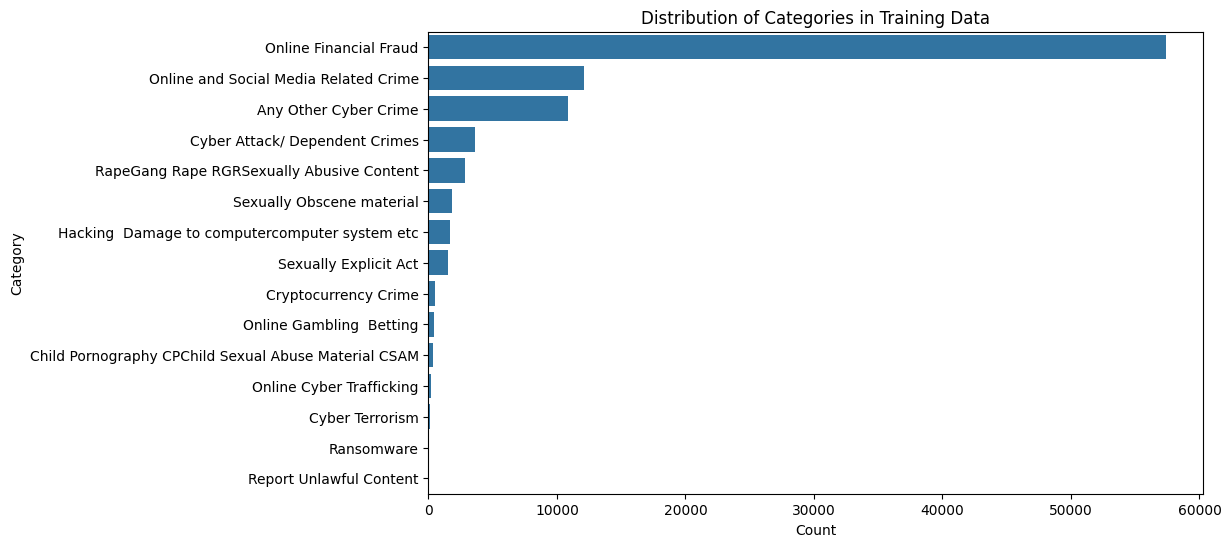

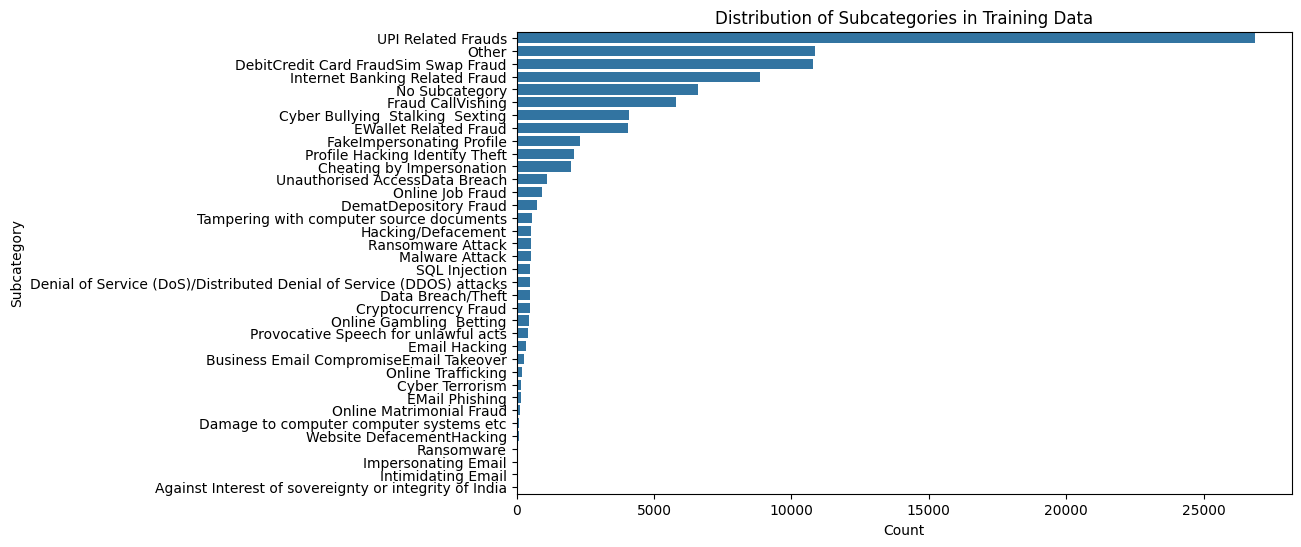

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Category distribution in training data
plt.figure(figsize=(10, 6))
sns.countplot(y='category', data=df1, order=df1['category'].value_counts().index)
plt.title("Distribution of Categories in Training Data")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Subcategory distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='sub_category', data=df1, order=df1['sub_category'].value_counts().index)
plt.title("Distribution of Subcategories in Training Data")
plt.xlabel("Count")
plt.ylabel("Subcategory")
plt.show()


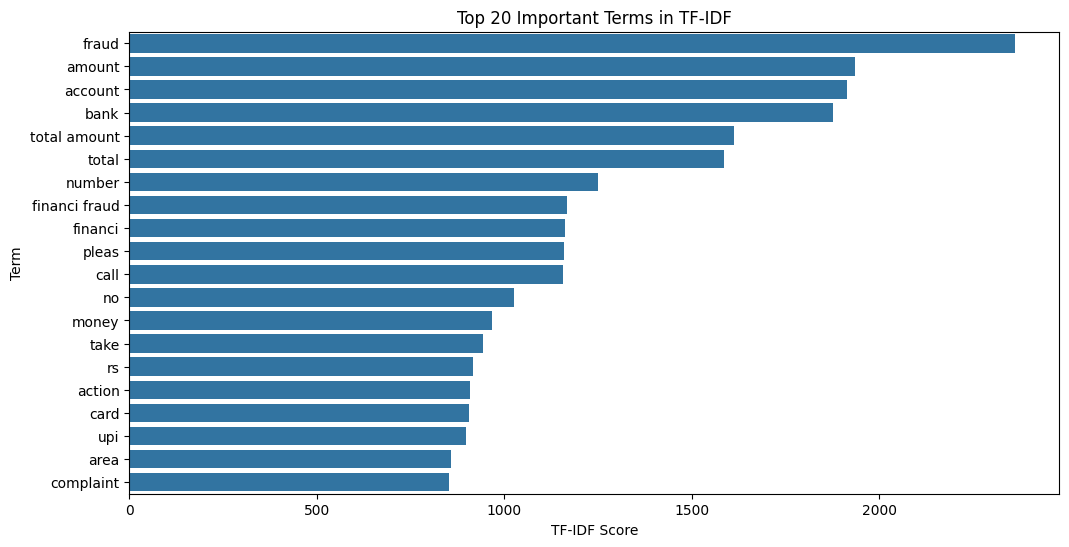

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Get feature names from the vectorizer
tfidf_vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
X_tfidf = tfidf_vectorizer.fit_transform(df1['crimeaditionalinfo'])

# Sum up the TF-IDF scores for each term across all documents
sum_tfidf = X_tfidf.sum(axis=0)
term_freq = [(word, sum_tfidf[0, idx]) for word, idx in tfidf_vectorizer.vocabulary_.items()]
term_freq = sorted(term_freq, key=lambda x: x[1], reverse=True)[:20]

# Create DataFrame and plot
term_freq_df = pd.DataFrame(term_freq, columns=["Term", "TF-IDF Score"])
plt.figure(figsize=(12, 6))
sns.barplot(x="TF-IDF Score", y="Term", data=term_freq_df)
plt.title("Top 20 Important Terms in TF-IDF")
plt.xlabel("TF-IDF Score")
plt.ylabel("Term")
plt.show()


/var/folders/js/0lbwmbwj7rjccdmpwxqcdhrm0000gn/T/ipykernel_51078/540066504.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=metrics_df, palette="Blues_d")


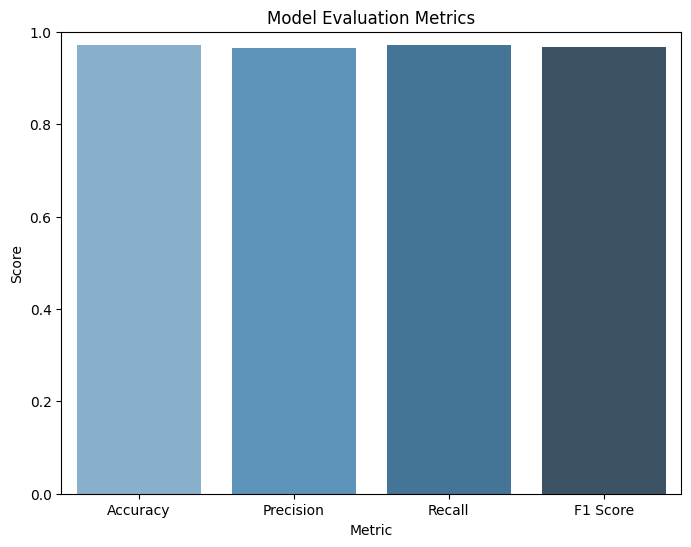

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy=accuracy / num_categories
precision = precision_total / num_categories
recall=recall_total / num_categories
f1 = 2/((1/precision) +(1/recall))

# Collect metrics in a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score"],
    "Score": [accuracy, precision, recall, f1]
})

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x="Metric", y="Score", data=metrics_df, palette="Blues_d")
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)
plt.xlabel("Metric")
plt.ylabel("Score")
plt.show()

In [34]:
def categoryPrediction(description):

  description = description.lower()
  description = decontract(description)
  description = cleanPunc(description)
  description = keepAlpha(description)
  description = removeStopWords(description)
  description = stemming(description)

  information = description
  X_api1 = vectorizer.transform([information])

  accuracy = 0
  modelNumber = 1
  for category in df2.columns[3:18]:
    filename = str(modelNumber)+"_model.sav"
    modelNumber += 1
    LR_pipeline1 = joblib.load(filename)

    prediction = LR_pipeline1.predict(X_api1)
    if prediction==1:
      print('CATEGORY: {}'.format(category))

In [35]:
description = "The above fraudster is continuously messaging me and Asking me to pay him money or he will send fake  cropped nude photos of me to my other contacts through WhatsApp I am unaware how he has recieved my contacts list from my phone Please help"
categoryPrediction(description)

CATEGORY: Category_Online Financial Fraud


In [36]:
y_test_sc.shape

(31229, 38)

In [37]:
description = '''FRAUD UPI PAYTM
BANK 	Punjab National Bank including Oriental Bank of Commerce and United Bank of India
ACCOUNT NUMBER
TOTAL AMOUNT
PLEASE HOLD REVERSE TOTAL AMOUNT IN THE COMPLAINT ACCOUNT AND TAKE NECESSARY ACTION
'''
categoryPrediction(description)

CATEGORY: Category_Online Financial Fraud


In [38]:
description = "I had continue received random calls and abusive messages in my whatsapp Someone added my number in a unknown facebook group name with  Only Girls  and still getting calls from unknown numbers pls help me and sort out the issue  as soon as possible Thank you"
categoryPrediction(description)

CATEGORY: Category_Online and Social Media Related Crime


# **SUBCATEGORY DIVISION**

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [41]:
most_common_cat = pd.DataFrame()
most_common_cat['category'] = df.columns[19:]
most_common_cat['count'] = df.iloc[:,19:].sum().values
most_common_cat.sort_values(['count'], inplace=True, ascending=False)
most_common_cat.reset_index(inplace=True, drop=True)
print(most_common_cat.head())

                                            category  count
0                    Sub_Category_UPI Related Frauds  35746
1                                 Sub_Category_Other  14548
2  Sub_Category_DebitCredit Card FraudSim Swap Fraud  14361
3        Sub_Category_Internet Banking Related Fraud  11845
4                        Sub_Category_No Subcategory   8827


In [42]:
most_common_cat['class_weight'] = len(most_common_cat) / most_common_cat['count']
class_weight = {}
most_common_cat.head()

,category,count,class_weight
0,Sub_Category_UPI Related Frauds,35746,0.001091
1,Sub_Category_Other,14548,0.002681
2,Sub_Category_DebitCredit Card FraudSim Swap Fraud,14361,0.002716
3,Sub_Category_Internet Banking Related Fraud,11845,0.003293
4,Sub_Category_No Subcategory,8827,0.004418


In [43]:
tokenizer = Tokenizer(num_words=5000, lower=True) # lower : boolean. Whether to convert the texts to lowercase. , num_words : the maximum number of words to keep, based on word frequency.
tokenizer.fit_on_texts(df['crimeaditionalinfo']) # encoding words of information to integers, Updates internal vocabulary based on a list of sequences.
sequences = tokenizer.texts_to_sequences(df['crimeaditionalinfo'])
x = pad_sequences(sequences, maxlen=500)

In [44]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(x, df[df.columns[19:-1]],
                                                    test_size=0.3,
                                                    random_state=0)

In [45]:
num_classes = y_train_sc.shape[1]
max_words = len(tokenizer.word_index) + 1
maxlen = 1000

In [46]:
df.columns[19:-1]

Index(['Sub_Category_Cyber Bullying  Stalking  Sexting',
       'Sub_Category_Fraud CallVishing',
       'Sub_Category_Online Gambling  Betting',
       'Sub_Category_Online Job Fraud', 'Sub_Category_UPI Related Frauds',
       'Sub_Category_Internet Banking Related Fraud',
       'Sub_Category_No Subcategory', 'Sub_Category_Other',
       'Sub_Category_Profile Hacking Identity Theft',
       'Sub_Category_DebitCredit Card FraudSim Swap Fraud',
       'Sub_Category_EWallet Related Fraud', 'Sub_Category_Data Breach/Theft',
       'Sub_Category_Cheating by Impersonation',
       'Sub_Category_Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
       'Sub_Category_FakeImpersonating Profile',
       'Sub_Category_Cryptocurrency Fraud', 'Sub_Category_Malware Attack',
       'Sub_Category_Business Email CompromiseEmail Takeover',
       'Sub_Category_Email Hacking', 'Sub_Category_Hacking/Defacement',
       'Sub_Category_Unauthorised AccessData Breach',
       'Sub_Catego

In [47]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalMaxPool1D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf

model = Sequential()
model.add(Embedding(max_words, 300, input_length=maxlen)) # Turns positive integers (indexes) into dense vectors of fixed size, input_dim = 500, output_dim = 300
#model.add(Dropout(0.2))
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(optimizer=Adam(0.015), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
callbacks = [
    ReduceLROnPlateau(), # Reduce learning rate when a metric has stopped improving
    #EarlyStopping(patience=10),
    ModelCheckpoint(filepath='model-neural-net.keras', save_best_only=True)
]
model.build(input_shape=(None, 500))  # Build the model with an input shape
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 300)       │    36,072,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500, 300)       │        90,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 300)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        11,438 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,174,338 (137.99 MB)

 Trainable params: 36,174,338 (137.99 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
y_train_sc.head()

,Sub_Category_Cyber Bullying Stalking Sexting,Sub_Category_Fraud CallVishing,Sub_Category_Online Gambling Betting,Sub_Category_Online Job Fraud,Sub_Category_UPI Related Frauds,Sub_Category_Internet Banking Related Fraud,Sub_Category_No Subcategory,Sub_Category_Other,Sub_Category_Profile Hacking Identity Theft,Sub_Category_DebitCredit Card FraudSim Swap Fraud,...,Sub_Category_Online Matrimonial Fraud,Sub_Category_Website DefacementHacking,Sub_Category_Damage to computer computer systems etc,Sub_Category_Impersonating Email,Sub_Category_EMail Phishing,Sub_Category_Ransomware,Sub_Category_Intimidating Email,Sub_Category_Against Interest of sovereignty or integrity of India,Sub_Category_Computer Generated CSAM/CSEM,Sub_Category_Cyber Blackmailing & Threatening
57281,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50740,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82338,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6018,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1702,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
history = model.fit(X_train_sc, y_train_sc,
                    class_weight=class_weight,
                    epochs=8,
                    batch_size=32,
                    validation_split=0.3,
                    callbacks=callbacks)

Epoch 1/8
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 263s 138ms/step - auc: 0.9370 - loss: 0.0744 - val_auc: 0.6270 - val_loss: 1.7210 - learning_rate: 0.0150
Epoch 2/8
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 267s 140ms/step - auc: 0.8609 - loss: 0.2093 - val_auc: 0.9195 - val_loss: 0.0760 - learning_rate: 0.0150
Epoch 3/8
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 271s 141ms/step - auc: 0.9248 - loss: 0.0753 - val_auc: 0.9254 - val_loss: 0.0768 - learning_rate: 0.0150
Epoch 4/8
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 265s 139ms/step - auc: 0.9243 - loss: 0.0817 - val_auc: 0.9205 - val_loss: 0.0989 - learning_rate: 0.0150
Epoch 5/8
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 268s 140ms/step - auc: 0.9245 - loss: 0.0806 - val_auc: 0.9252 - val_loss: 0.0756 - learning_rate: 0.0150
Epoch 6/8
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 275s 144ms/step - auc: 0.9198 - loss: 0.0904 - val_auc: 0.9114 - val_loss: 0.0811 - learning_rate: 0.0150
Epoch 7/8
1913/1913 ━━━━━━━━━━━━━━━━━━━━ 277s 145ms/step - auc: 0.9111 - loss: 0.0832 - val_auc: 0.8878 - val_loss: 0.

In [53]:
import joblib

# Save the model architecture and weights as separate components
joblib.dump(model.to_json(), 'model_architecture.json')  # Save architecture as JSON
joblib.dump(model.get_weights(), 'model_weights.pkl')    # Save weights with joblib


['model_weights.pkl']

In [54]:

from tensorflow.keras.models import model_from_json
import joblib

# Load architecture and weights
model_architecture = joblib.load('model_architecture.json')
model_weights = joblib.load('model_weights.pkl')

# Re-create the model and load the weights
loaded_model = model_from_json(model_architecture)
loaded_model.set_weights(model_weights)


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 0.0322
Test Precision: 0.3548
Test Recall: 0.0327


In [59]:
metrics = model.evaluate(X_test_sc, y_test_sc)
print("{}: {}".format(model.metrics_names[1], metrics[1]))
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Evaluate the model and print metrics like loss and AUC
metrics = model.evaluate(X_test_sc, y_test_sc)
print(f"{model.metrics_names[1]}: {metrics[1]:.4f}")  # Assuming 'AUC' is the second metric

# Predict on the test set
y_pred_prob = model.predict(X_test_sc)  # Get predicted probabilities
y_pred = (y_pred_prob > 0.01).astype(int)  # Convert probabilities to binary predictions (0 or 1)

# Calculate precision and recall
precision = 1 - precision_score(y_test_sc, y_pred, average='weighted')
recall = recall_score(y_test_sc, y_pred, average='weighted')
#accuracy = accuracy_score(y_test_sc, y_pred)  # Optional

# Print the results

print(f'Test Precision: {precision:.4f}')
print(f'Test Recall: {recall:.4f}')


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - auc: 0.8886 - loss: 0.0884
compile_metrics: 0.8876762986183167
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - auc: 0.8886 - loss: 0.0884
compile_metrics: 0.8877
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step
Test Precision: 0.8653
Test Recall: 0.9092


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
classes = [col for col in df.columns]
classes = classes[19:-1]
classes

['Sub_Category_Cyber Bullying  Stalking  Sexting',
 'Sub_Category_Fraud CallVishing',
 'Sub_Category_Online Gambling  Betting',
 'Sub_Category_Online Job Fraud',
 'Sub_Category_UPI Related Frauds',
 'Sub_Category_Internet Banking Related Fraud',
 'Sub_Category_No Subcategory',
 'Sub_Category_Other',
 'Sub_Category_Profile Hacking Identity Theft',
 'Sub_Category_DebitCredit Card FraudSim Swap Fraud',
 'Sub_Category_EWallet Related Fraud',
 'Sub_Category_Data Breach/Theft',
 'Sub_Category_Cheating by Impersonation',
 'Sub_Category_Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
 'Sub_Category_FakeImpersonating Profile',
 'Sub_Category_Cryptocurrency Fraud',
 'Sub_Category_Malware Attack',
 'Sub_Category_Business Email CompromiseEmail Takeover',
 'Sub_Category_Email Hacking',
 'Sub_Category_Hacking/Defacement',
 'Sub_Category_Unauthorised AccessData Breach',
 'Sub_Category_SQL Injection',
 'Sub_Category_Provocative Speech for unlawful acts',
 'Sub_Category_Ransomwar

In [ ]:
import operator
# Utility function to get predictions using Neural Net model
def categoryPredictionNN(description):
  # Data cleaning process


  description = description.lower()
  description = decontract(description)
  description = cleanPunc(description)
  description = keepAlpha(description)
  description = removeStopWords(description)
  description = stemming(description)

  information = description
  # necessary data preprocessing steps
  sequences = tokenizer.texts_to_sequences([information])
  x = pad_sequences(sequences, maxlen=500)
  prediction = model.predict(x)
  predScores = [score for pred in prediction for score in pred]
  predDict = {}
  for cla,score in zip(classes,predScores):
    predDict[cla] = score

  return sorted(predDict.items(), key=operator.itemgetter(1),reverse=True)[:10]

In [ ]:
description = "In apna Job I have applied for job interview for telecalling and the resource management wrote that twelve hundred will be charged for security amount of laptop and work from home when I have given interview on the given address next day they charged twelve hundred and six hundred more money in the name of insurance after that they have referred me to the job calling there is no work of laptop neither a work from home kindly please take action against it as soon as possible and if possible please help me to recover my financial loss"
print("The subcategory predicted:")
categoryPredictionNN(description)


The subcategory predicted:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


[('Sub_Category_Internet Banking Related Fraud', 0.19148348),
 ('Sub_Category_UPI Related Frauds', 0.10843916),
 ('Sub_Category_Fraud CallVishing', 0.1064378),
 ('Sub_Category_FakeImpersonating Profile', 0.09546776),
 ('Sub_Category_Cyber Bullying  Stalking  Sexting', 0.065091215),
 ('Sub_Category_No Subcategory', 0.024979215),
 ('Sub_Category_DematDepository Fraud', 0.018848496),
 ('Sub_Category_Other', 0.01580517),
 ('Sub_Category_Profile Hacking Identity Theft', 0.015641667),
 ('Sub_Category_Unauthorised AccessData Breach', 0.007371518)]

<ipython-input-53-e048b4a163b4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_common_subcat.head(10), x='count', y='sub_category', palette='viridis')


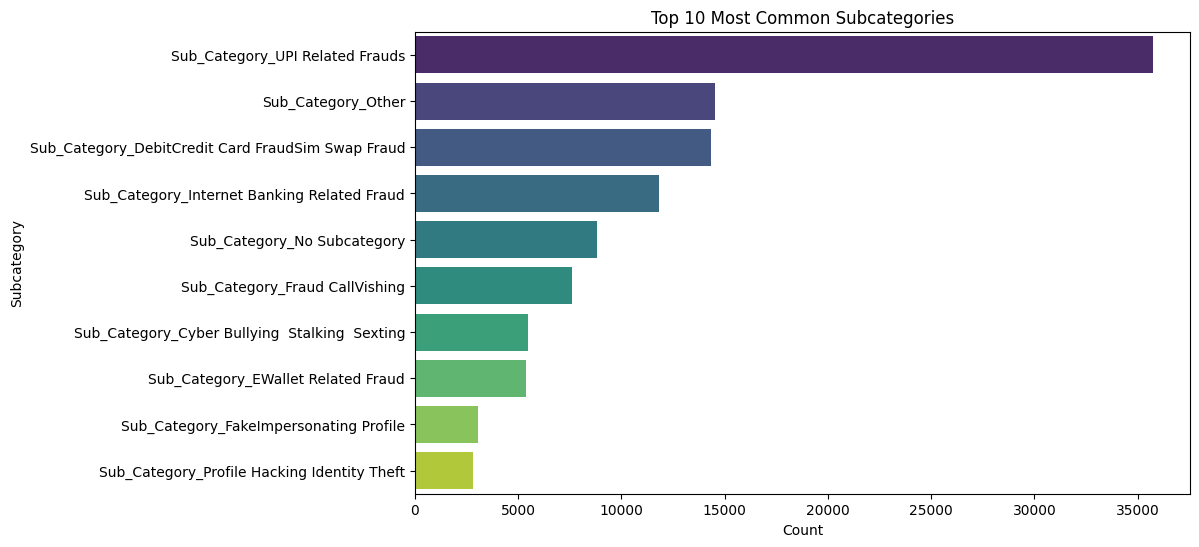

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot subcategories (assuming df contains subcategories as well)
most_common_subcat = pd.DataFrame()
most_common_subcat['sub_category'] = df.columns[19:-1]  # Adjust column indexing if needed
most_common_subcat['count'] = df.iloc[:, 19:-1].sum().values
most_common_subcat.sort_values(by='count', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=most_common_subcat.head(10), x='count', y='sub_category', palette='viridis')
plt.title("Top 10 Most Common Subcategories")
plt.xlabel("Count")
plt.ylabel("Subcategory")
plt.show()


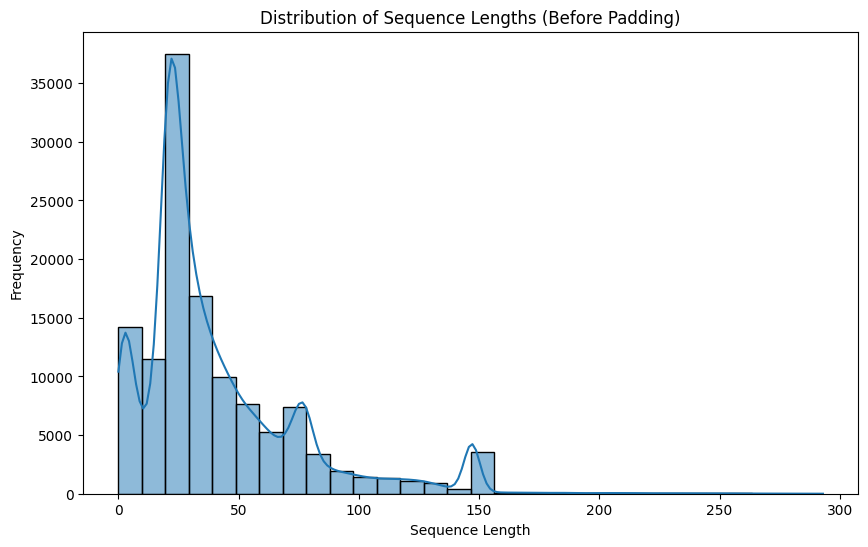

In [ ]:
# Lengths of sequences before padding
seq_lengths = [len(seq) for seq in sequences]

plt.figure(figsize=(10, 6))
sns.histplot(seq_lengths, bins=30, kde=True)
plt.title("Distribution of Sequence Lengths (Before Padding)")
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 105s 89ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/me

<Figure size 1200x800 with 0 Axes>

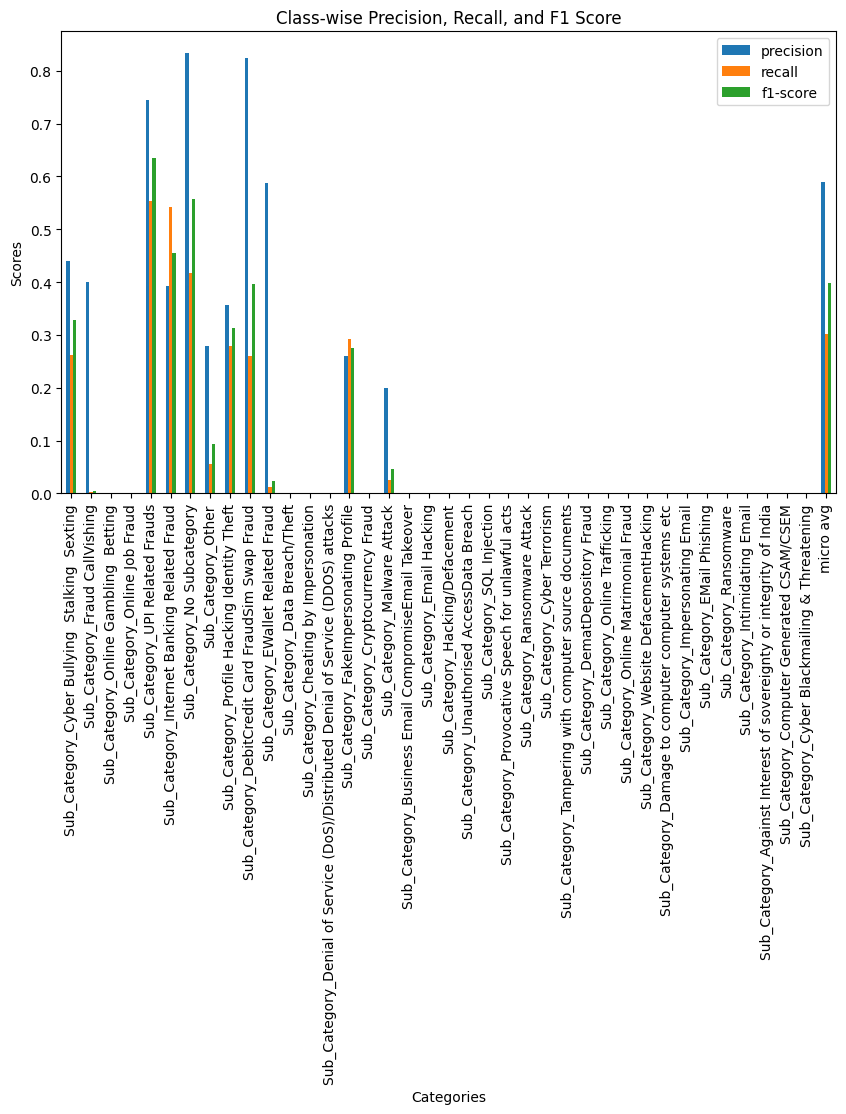

In [ ]:
from sklearn.metrics import classification_report

# Calculate predictions and generate a classification report
y_pred_sc = model.predict(X_test_sc)
y_pred_classes = (y_pred_sc > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate a classification report and visualize
report = classification_report(y_test_sc, y_pred_classes, target_names=classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot Precision, Recall, and F1 Score
plt.figure(figsize=(12, 8))
report_df.iloc[:-3, :-1].plot(kind='bar', figsize=(10, 6))
plt.title("Class-wise Precision, Recall, and F1 Score")
plt.xlabel("Categories")
plt.ylabel("Scores")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


<ipython-input-56-be75e47fd3d8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=top_categories, palette="coolwarm")


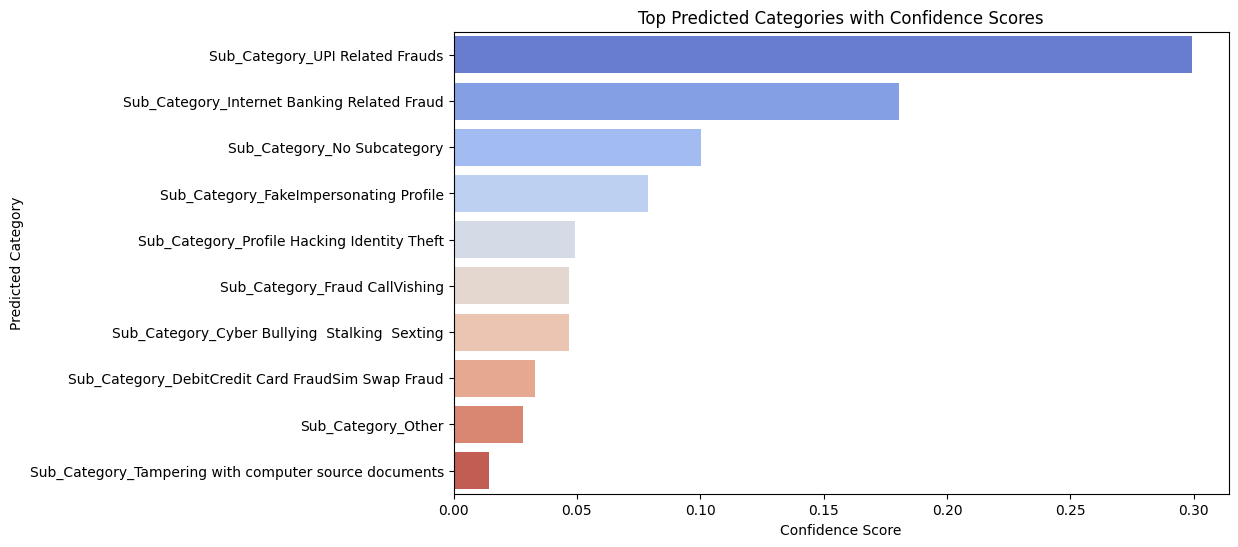

In [ ]:
# Prediction function for a sample text
description = "In apna Job I have applied for job interview for telecalling ... please help me to recover my financial loss"
predictions = categoryPredictionNN(description)

# Visualize the top predicted categories and their scores
top_categories, scores = zip(*predictions)
plt.figure(figsize=(10, 6))
sns.barplot(x=scores, y=top_categories, palette="coolwarm")
plt.title("Top Predicted Categories with Confidence Scores")
plt.xlabel("Confidence Score")
plt.ylabel("Predicted Category")
plt.show()
